We will first create a baseline model using all of the available data and the average house price. 

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.ticker import FuncFormatter
from sklearn.dummy import DummyClassifier
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [125]:
original_df = pd.read_csv('data/kc_house_data.csv')
df = original_df.copy()
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


First clean all the data to take care of null values and change categorical to numerical.

In [126]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [127]:
# for now we are converting all the Nulls with the the '0', or 'NO', or 'NONE' of their respective columns
# because they are overwhelmingly the most common value, so we think it's a safe assumption.

df['waterfront'] = df['waterfront'].fillna('NO')
df['yr_renovated'].fillna(0.0, inplace=True)
df['view'].fillna('NONE', inplace=True)

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [128]:
# Take apart the date column, put it in to three columns as day month and year and have the values numeric.
df['date'] = pd.to_datetime(df['date'])
df['day_sold'] = df['date'].map(lambda x: x.day)
df['month_sold'] = df['date'].map(lambda x: x.month)
df['year_sold'] = df['date'].map(lambda x: x.year)
df.drop('date', axis=1, inplace=True)

In [129]:
# We simply convert the yes or no values to 1 and 0 respectively.
waterfront = preprocessing.LabelEncoder()
x1 = list(df['waterfront'])


waterfront.fit(x1)
waterfront_list = waterfront.transform(x1)
df['waterfront'] = waterfront_list
df['waterfront'].value_counts()


# 0 is NO WATERFRONT
# 1 is YES WATERFRONT

0    21451
1      146
Name: waterfront, dtype: int64

In [130]:
# # Here we turn each unique value into a column and the column will have a 1 or 0 in it
# # to say if that column is true for that house.
# view = OneHotEncoder(sparse=False, handle_unknown='ignore')
# x2 = df[['view']]
# view.fit(x2)
# view.transform(x2)
# view_array = view.transform(x2)
# view_panda = pd.DataFrame(view_array, columns=('View_Average', 'View_Excellent', 'View_Fair', 'View_Good', 'View_None'), index=df.index)
# df = pd.concat([df, view_panda], axis=1)


In [131]:
# # Do the same as we did for view.
# condition = OneHotEncoder(sparse=False, handle_unknown='ignore')
# X3 = df[['condition']]
# condition.fit(X3)
# condition.transform(X3)
# condition_array = condition.transform(X3)
# condition_panda = pd.DataFrame(condition_array, columns=('Cond_Average', 'Cond_Fair', 'Cond_Good', 'Cond_Poor',
#                                                          'Cond_VeryGood'), index=df.index)
# df = pd.concat([df, condition_panda], axis=1)

In [132]:
# # And again the same for grade.
# grade = OneHotEncoder(sparse=False, handle_unknown='ignore')
# x4 = df[['grade']]
# grade.fit(x4)
# grade_array = grade.transform(x4)
# grade_panda = pd.DataFrame(grade_array, columns= ('VeryGoodGrade', 'ExcellentGrade', 'LuxurGrade', 'MansionGrade',
#                                                   'PoorGrade', 'LowGrade', 'FairGrade','LowAvgGrade','AvgGrade',
#                                                   'GoodGrade', 'BetterGrade',),index=df.index)
# df = pd.concat([df, grade_panda], axis=1)

In [133]:
df.view.replace({'NONE': 0, 'AVERAGE': 2, 'FAIR': 1, 'GOOD': 3, 'EXCELLENT': 4}, inplace=True)

df.condition.replace({'Poor': 1, 'Average': 3, 'Fair': 2, 'Good': 4, 'Very Good': 5}, inplace=True)

df.grade.replace({'7 Average': 7, '8 Good': 8, '9 Better': 9, '6 Low Average': 6, '10 Very Good': 10,
                       '11 Excellent': 11, '5 Fair': 5, '12 Luxury': 12, '13 Mansion': 13, '3 Poor': 3,
                        '4 Low': 4}, inplace=True)

In [134]:
# Convert all the ? values to 0.0 like we did for the other columns.
# Then convert the values from strings to int

df['sqft_basement'] = df["sqft_basement"].replace({"?": '0.0'})
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [135]:
# # We can drop the original columns that we just converted.
# df.drop(columns=('condition'), inplace=True)
# df.drop(columns=('view'), inplace=True)
# df.drop(columns=('grade'), inplace=True)
# df.drop(['Cond_Average', 'View_None', 'AvgGrade'], axis=1, inplace=True)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

We now have zero missing values and everything is int or float.
We can start working on our baseline model.

In [137]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100)

In [138]:
baseline = DummyRegressor()
baseline.fit(X_train, y_train)
baseline.score(X_test, y_test)

-0.0002252015545449737

We see that our baseline score, which is from always predicting the average price is very low.
Let's start trying to make real predictions using a Linear regressionon all the data.

### Creating a Simple Model

It's first somewhat important to create a simple model of just two variables where we're choosing the independent variable based on the correlation to the dependendent variable, price. We can create a correlation heatmap to show us this information.

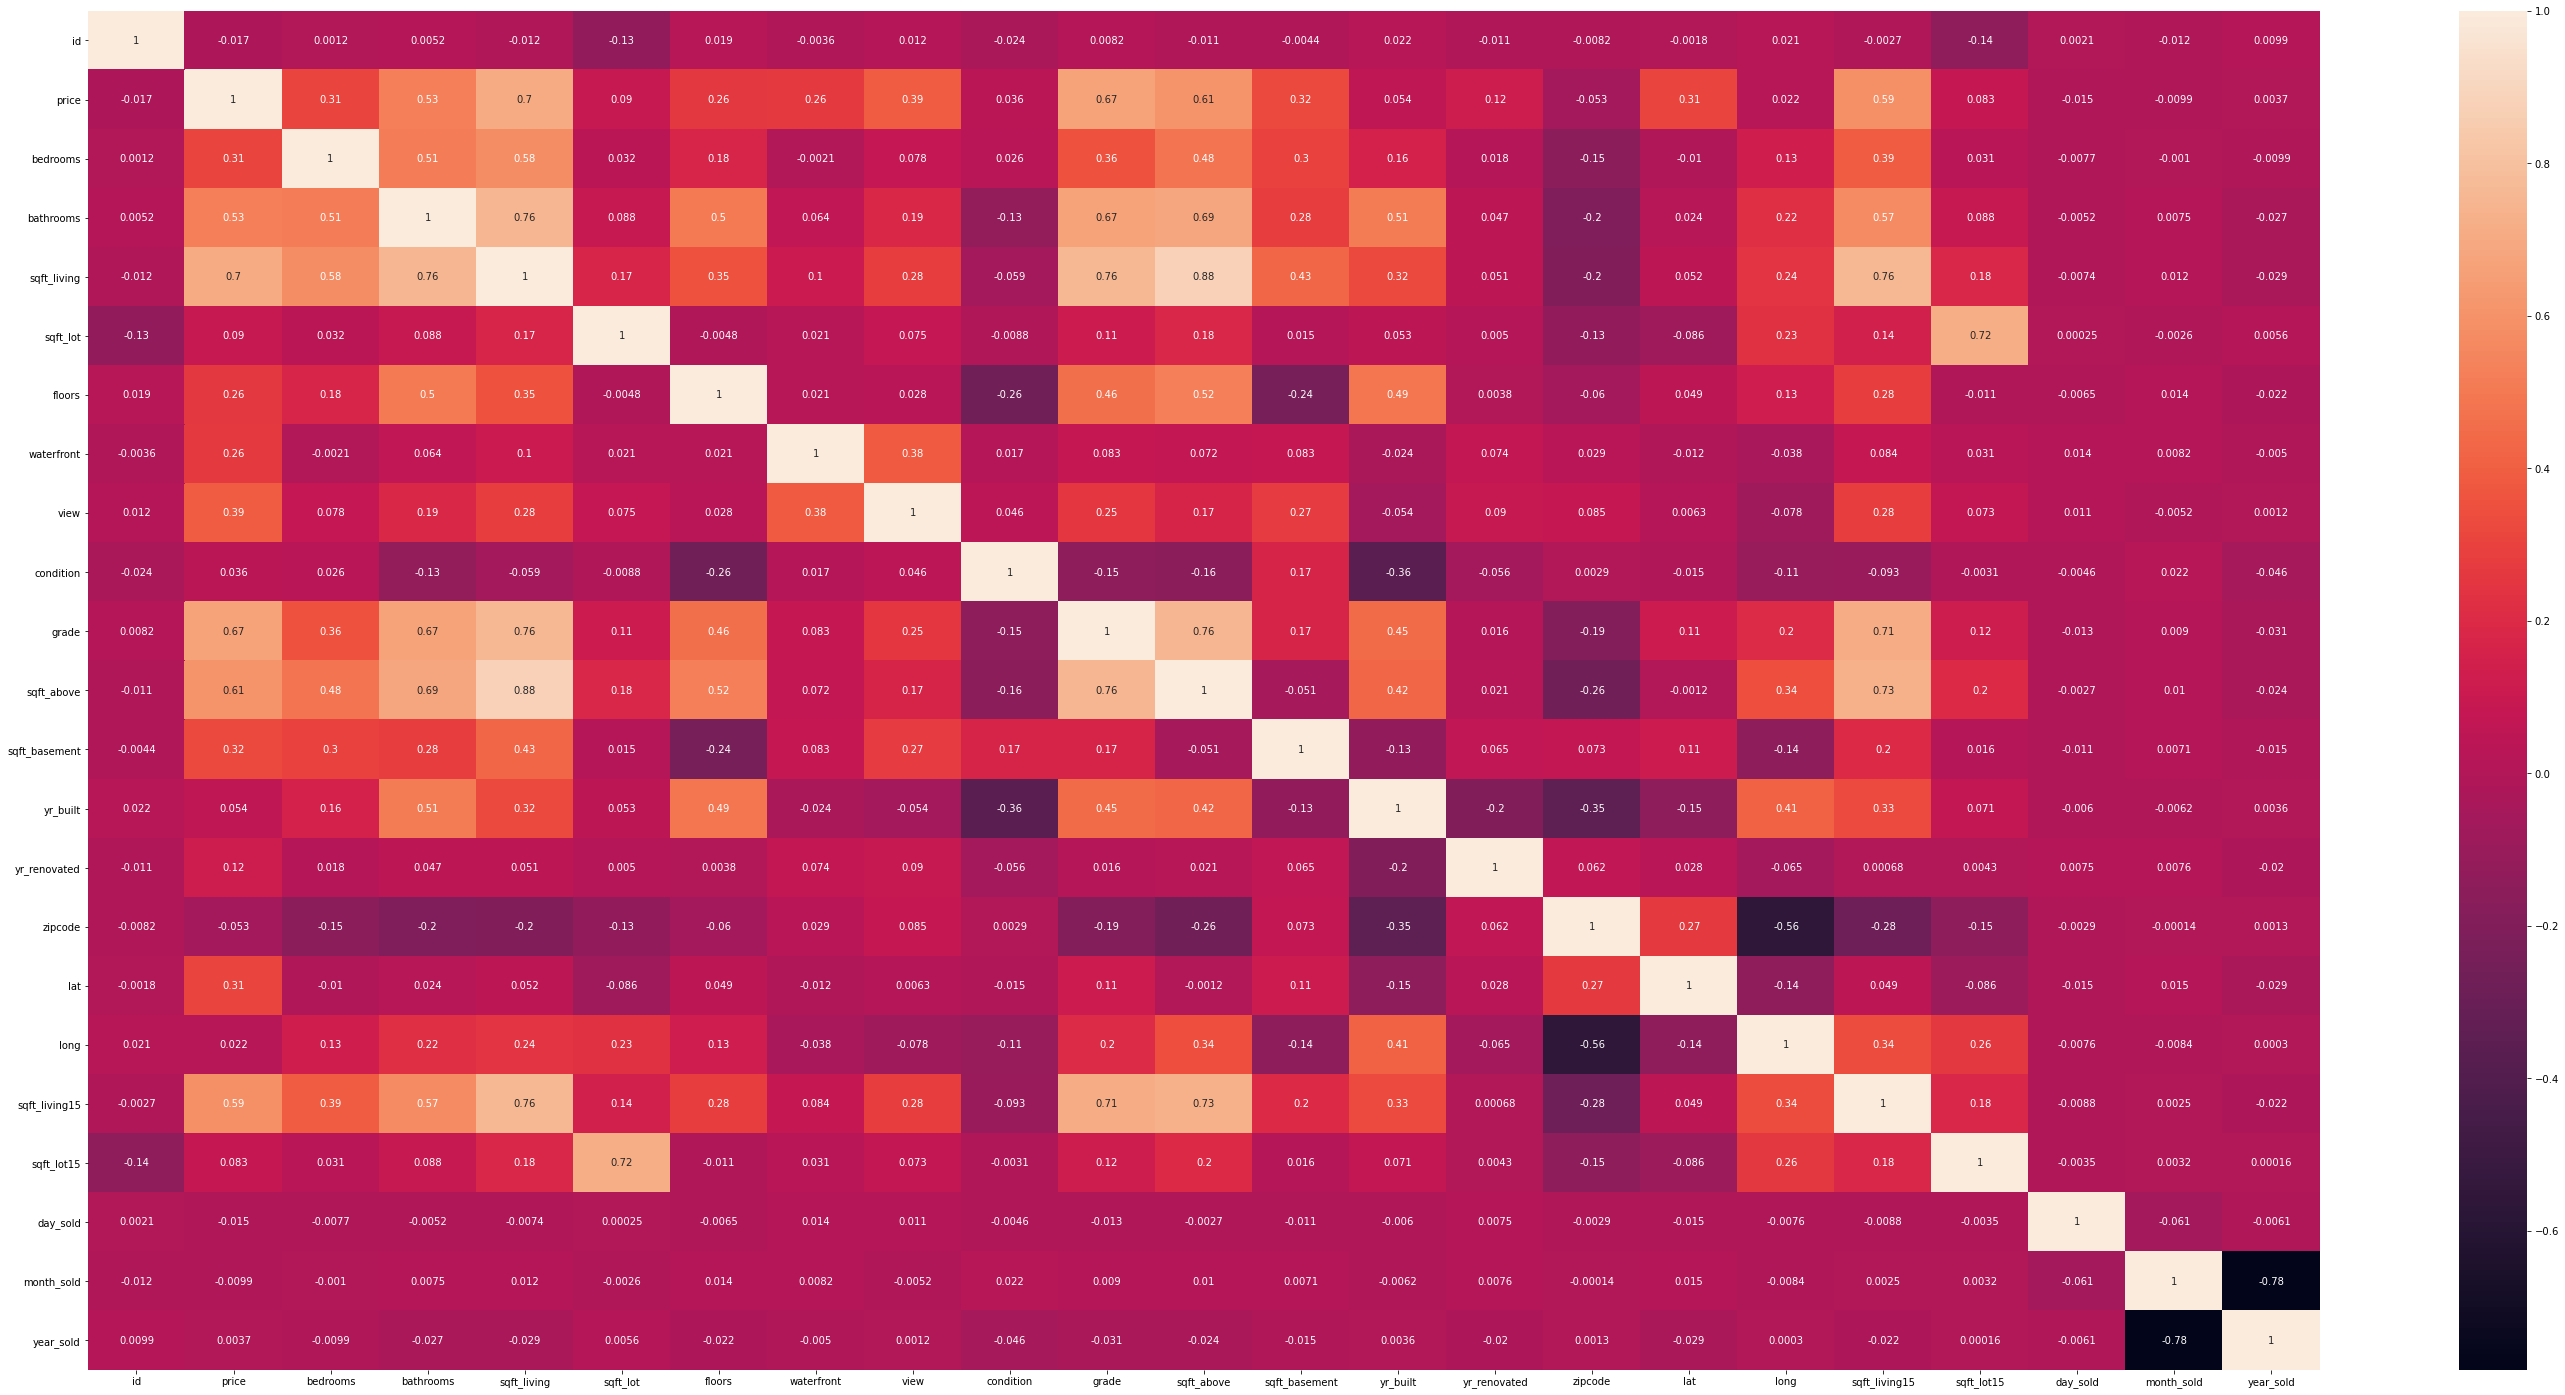

In [139]:
df.corr()
plt.figure(figsize=(50, 25))
sns.heatmap(data=df.corr(), annot=True);

In this case and while the graph is super small, we can see that price and sqft_living columns have the highest correlation. For that, we'll create a simple model based on this.

In [140]:
formula_simple = 'price ~ sqft_living'
model = ols(formula=formula_simple, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:30:29   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
x_simple= df[['sqft_living']]
y_simple= df['price']

x_train_simple, x_test_simple, y_train_simple, y_test_simple = train_test_split(x_simple, y_simple, random_state=100)

lr=LinearRegression()
lr.fit(x_train_simple, y_train_simple)
lr.score(x_test_simple, y_test_simple)

0.48733518973535617

In [142]:
lr.score(x_train_simple, y_train_simple)

0.4945445156766466

We can see that we perform worse on our test data vs. the train data. This model is extremely simple however it does show a bit of overfitting given that maybe our model relies too much on the training data.

In [143]:
error = lr.predict(x_test_simple)-y_test_simple
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
print(mean_sqr_of_errors)
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print(sqr_mean_sqr_errors)

78113104038.57623
279487.2162346182


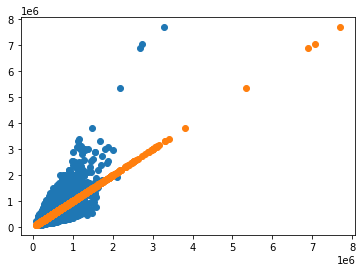

In [144]:
ypred = lr.predict(x_test_simple)
plt.scatter((ypred) , (y_test_simple))
plt.scatter((y_test_simple),(y_test_simple));

## Trying to determine the statistically significant values

In [145]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)


0.7069985738787832

In [146]:
lr.score(X_test, y_test)

0.6866354619291462

In [147]:
outcome = 'price'
predictors = df.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2308.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:30:30   Log-Likelihood:            -2.9432e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21574   BIC:                         5.889e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.682e+07   9.97e+06     -6.701      0.000   -8.64e+07   -4.73e+07
id            -1.348e-06   4.81e-07     -2.801      0.005   -2.29e-06   -4.05e-07
bedrooms      -3.611e+04   1895.453    -19.050      0.000   -3.98e+04   -3.24e+04
bathrooms      4.185e+04   3253.776     12.862      0.000    3.55e+04    4.82e+04
sqft_living     103.7644     18.027      5.756      0.000      68.431     139.098
sqft_lot          0.1177      0.048      2.459      0.014       0.024       0.211
floors         7644.5741   3591.351      2.129      0.033     605.261    1.47e+04
waterfront     6.188e+05   1.81e+04     34.212      0.000    5.83e+05    6.54e+05
view           5.316e+04   2117.328     25.109      0.000     4.9e+04    5.73e+04
condition      2.807e+04   2344.433     11.971      0.000    2.35e+04    3.27e+04
grade          9.726e+04   2155.477     45.122      0.000     9.3e+04    1.01e+05
sqft_above       77.0668     18.018      4.277      0.000      41.750     112.383
sqft_basement    46.9048     17.858      2.627      0.009      11.902      81.908
yr_built      -2639.9001     71.732    -36.802      0.000   -2780.500   -2499.300
yr_renovated     24.4748      3.968      6.169      0.000      16.698      32.252
zipcode        -584.8168     32.901    -17.775      0.000    -649.306    -520.328
lat            6.027e+05   1.07e+04     56.260      0.000    5.82e+05    6.24e+05
long          -2.156e+05   1.31e+04    -16.405      0.000   -2.41e+05    -1.9e+05
sqft_living15    21.5470      3.441      6.262      0.000      14.802      28.292
sqft_lot15       -0.4007      0.073     -5.464      0.000      -0.544      -0.257
day_sold       -360.8721    159.163     -2.267      0.023    -672.843     -48.902
month_sold     1130.0414    708.768      1.594      0.111    -259.197    2519.280
year_sold      3.657e+04   4721.636      7.746      0.000    2.73e+04    4.58e+04
==============================================================================
Omnibus:                    18405.094   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1877386.440
Skew:                           3.576   Prob(JB):                         0.00
Kurtosis:                      48.112   Cond. No.                     3.95e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We see our R-squared is relatively good but we don't know how big our errors are.

In [148]:
 y_pred = model.predict(X_test)
# error=y_pred-y_test
# sq_of_err=(error)**2
# mean_sqr_of_errors=sq_of_err.mean()
# print(mean_sqr_of_errors)
# sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
# print(sqr_mean_sqr_errors)
from sklearn import metrics
actual = y_test
predicted = y_pred

mse = metrics.mean_squared_error(actual, predicted)

rmse = np.sqrt(mse)

print(rmse)

217267.96826617979


That is obviously a massive error. But it is still better than what we had just using sqft_living. We'll try to work on the data to normalize it and find the best variables to use so that 
We limit our error while keeping our R-squared high.

Let's take a look at all the variables graphed against price.

## Checking  for linearity between price and independent variables

In [149]:
# fig, axes = plt.subplots(ncols=3, nrows=8, figsize=(10, 25))
# fig.set_tight_layout(True)

# for index, col in enumerate(X.columns):
#     ax = axes[index//3][index%3]
#     ax.scatter(X[col], np.log(y), alpha=0.2)
#     ax.set_xlabel(col)
#     ax.set_ylabel("listing price")

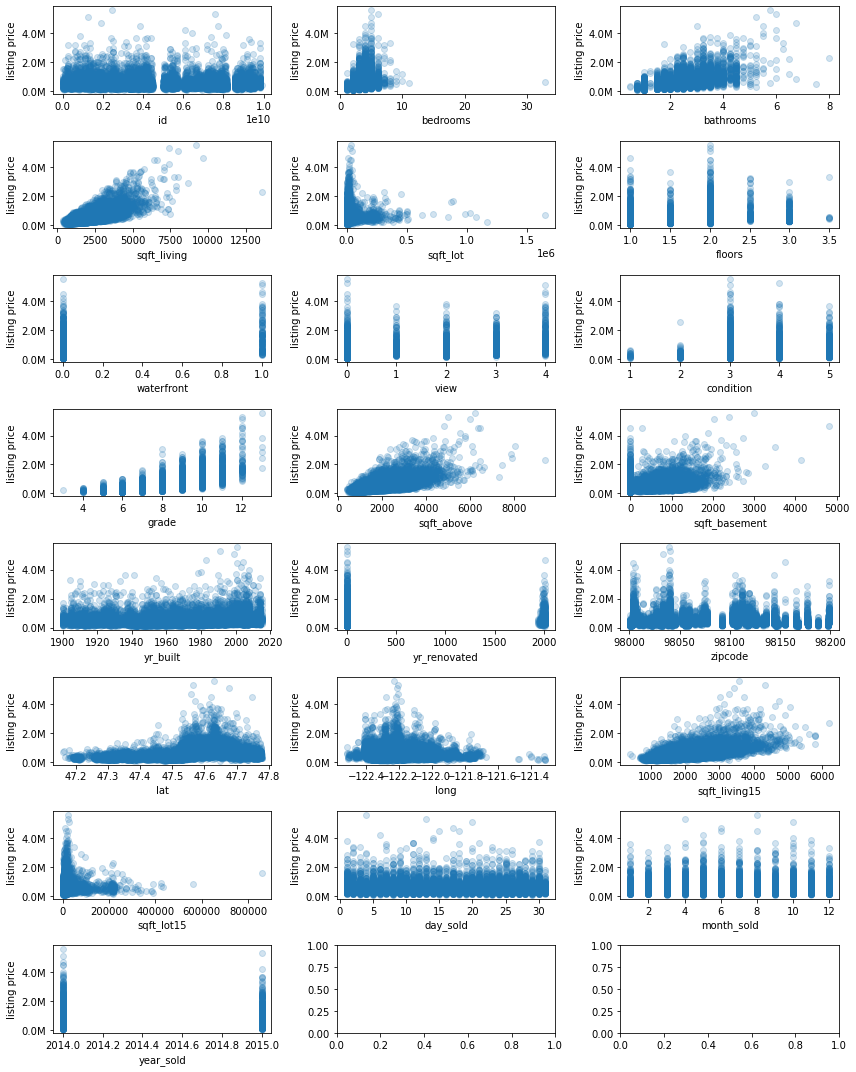

In [150]:
# Used in converting x and y axis ticks.

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

fig, axes = plt.subplots(ncols=3, nrows=8, figsize=(12, 15))
fig.set_tight_layout(True)

for index, col in enumerate(X_train.columns):
    ax = axes[index//3][index%3]
    ax.yaxis.set_major_formatter(formatter)
    ax.scatter(X_train[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")

From the above graphs, we can see that the following independent variables have a linear relationship to listing price.
* sqft_living15
* grade
* sqft_above
* sqft_basement
* sqft_living
* bathrooms
* bedrooms

We can drop the remainder of these columns given that they do not follow the one of the assumptions we need to make for linear regression.

In [151]:
linear_df = df[['sqft_living', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'bathrooms', 'bedrooms', 'price']]

# def millions(x, pos):
#     'The two args are the value and tick position'
#     return '%1.1fM' % (x * 1e-6)

# formatter = FuncFormatter(millions)

# fig, axes = plt.subplots(ncols=3, nrows=8, figsize=(12, 12))
# fig.set_tight_layout(True)

# for index, col in enumerate(linear_df.columns):
#     ax = axes[index//3][index%3]
#     ax.yaxis.set_major_formatter(formatter)
#     ax.scatter(linear_df[col], y_train, alpha=0.2)
#     ax.set_xlabel(col)
#     ax.set_ylabel("listing price")

 ## CHECKING FOR COLLINEARITY BETWEEN INDEPENDENT VARIABLES

In [152]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

corr_df=linear_df.drop('price', axis=1).corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# set index to pairs
corr_df.set_index(['pairs'], inplace = True)

#d rop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
corr_df.columns = ['cc4']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
corr_df.drop_duplicates(inplace=True)
corr_df[(corr_df.cc4>.75) & (corr_df.cc4 <1)]

,cc4
pairs,
"(sqft_living, sqft_above)",0.876448
"(sqft_living, grade)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(sqft_above, grade)",0.756073
"(bathrooms, sqft_living)",0.755758


Looks like there's a good amount of colinnearity (spelling?) in our data. 
In order to avoid this we have to drop one variable from each pair.
If we dropped sqft_living and sqft_above, we'd be able to keep grade, bathrooms, sqft_living15. We also still have our bedrooms variable, as well as our sqft_basement.


But are these variables all correlated with price?

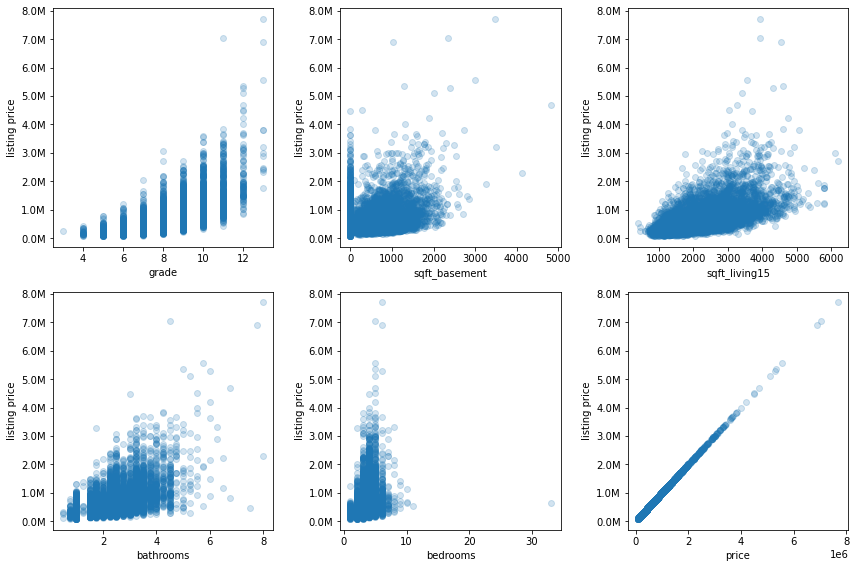

In [153]:
non_colin_df = linear_df.drop(['sqft_living', 'sqft_above'], axis=1)

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(non_colin_df.columns):
    ax = axes[index//3][index%3]
    ax.yaxis.set_major_formatter(formatter)
    ax.scatter(non_colin_df[col], non_colin_df['price'], alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")

We see that everything is linear with price and we checked eariler to ensure that none of these are colinear.


Now We'll move on to checking for the rest of the assumptions.

In [154]:
X = non_colin_df.drop('price', axis=1)
y = non_colin_df['price']
lin_X_train, lin_X_test, lin_y_train, lin_y_test = train_test_split(X,y, random_state=100)

In [155]:
outcome = 'price'
predictors = lin_X_train
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_with_linear_variables = ols(formula=formula, data=non_colinear_df).fit()
model_with_linear_variables.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     3543.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:30:42   Log-Likelihood:            -2.2419e+05
No. Observations:               16197   AIC:                         4.484e+05
Df Residuals:                   16191   BIC:                         4.484e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.412e+05   1.53e+04    -55.049      0.000   -8.71e+05   -8.11e+05
grade          1.439e+05   2676.165     53.776      0.000    1.39e+05    1.49e+05
sqft_basement   163.2586      4.692     34.796      0.000     154.062     172.455
sqft_living15    99.5974      4.185     23.796      0.000      91.393     107.801
bathrooms      3.103e+04   3746.452      8.282      0.000    2.37e+04    3.84e+04
bedrooms      -9113.0229   2514.735     -3.624      0.000    -1.4e+04   -4183.864
==============================================================================
Omnibus:                    11664.336   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           413074.371
Skew:                           3.053   Prob(JB):                         0.00
Kurtosis:                      26.975   Cond. No.                     1.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

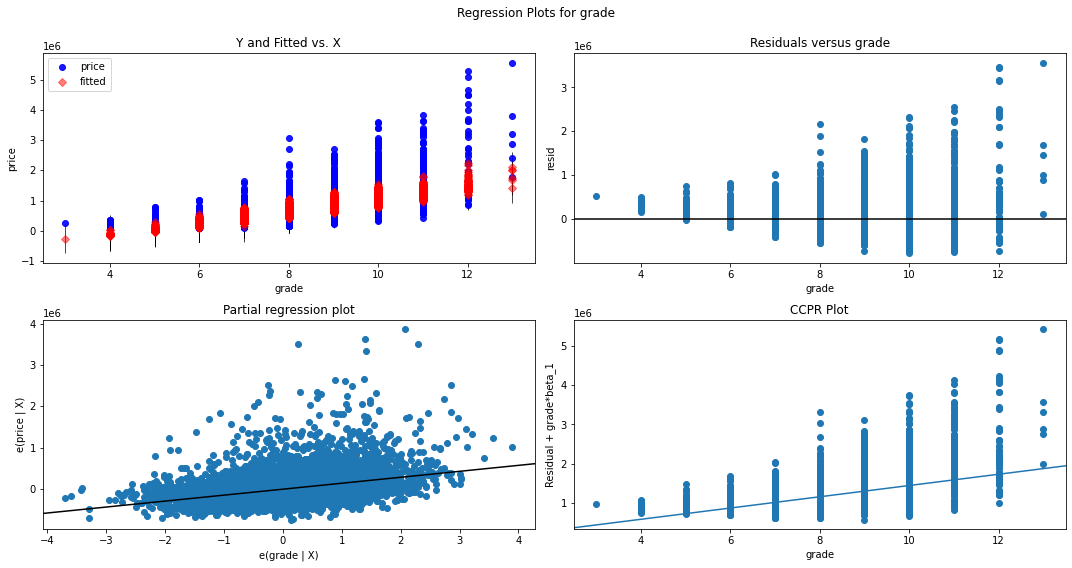

In [156]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_with_linear_variables, "grade", fig=fig)
plt.show()

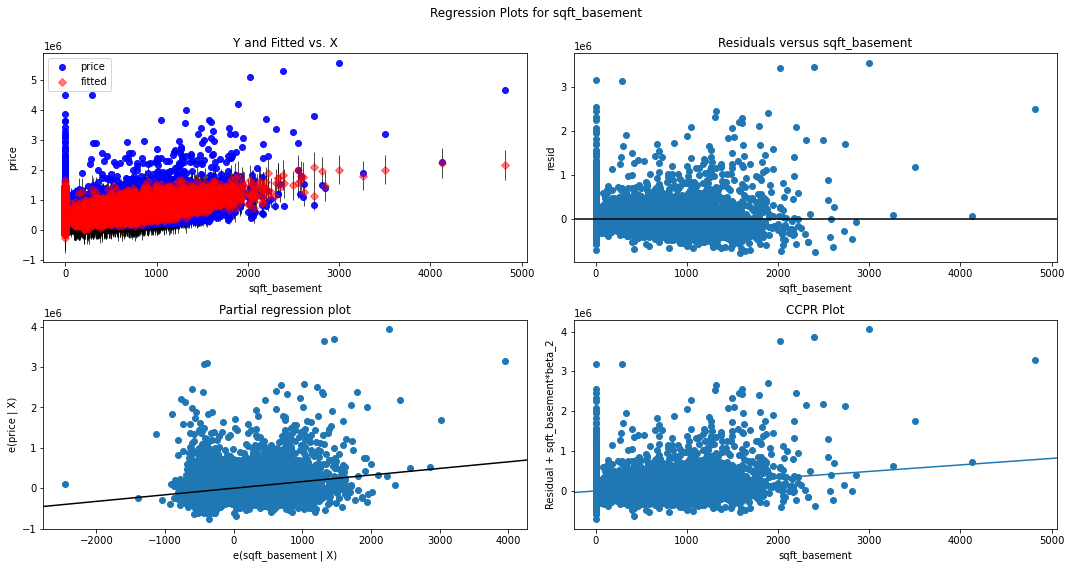

In [157]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_with_linear_variables, "sqft_basement", fig=fig)
plt.show()

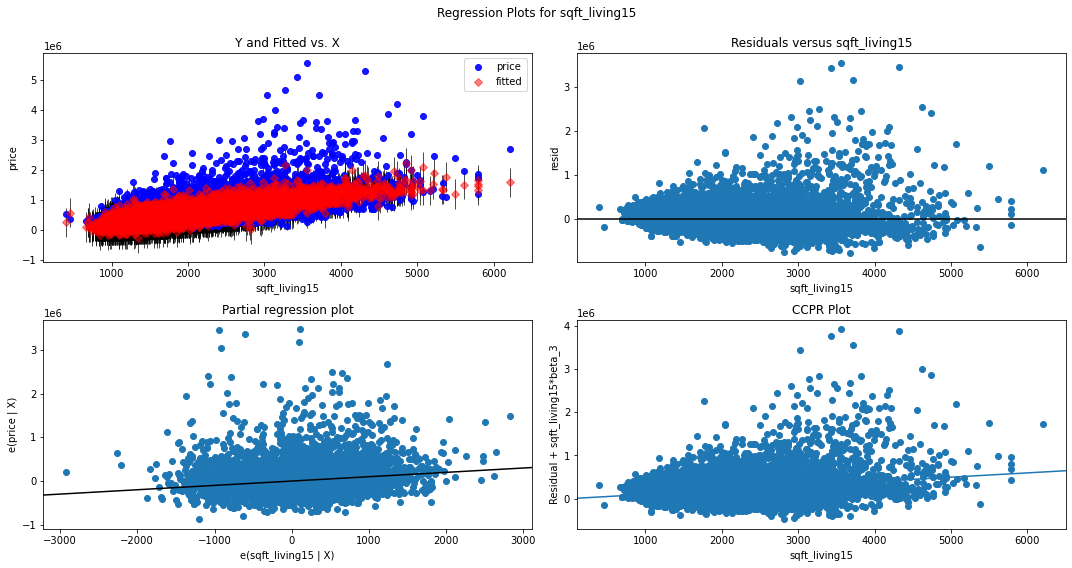

In [158]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_with_linear_variables, "sqft_living15", fig=fig)
plt.show()

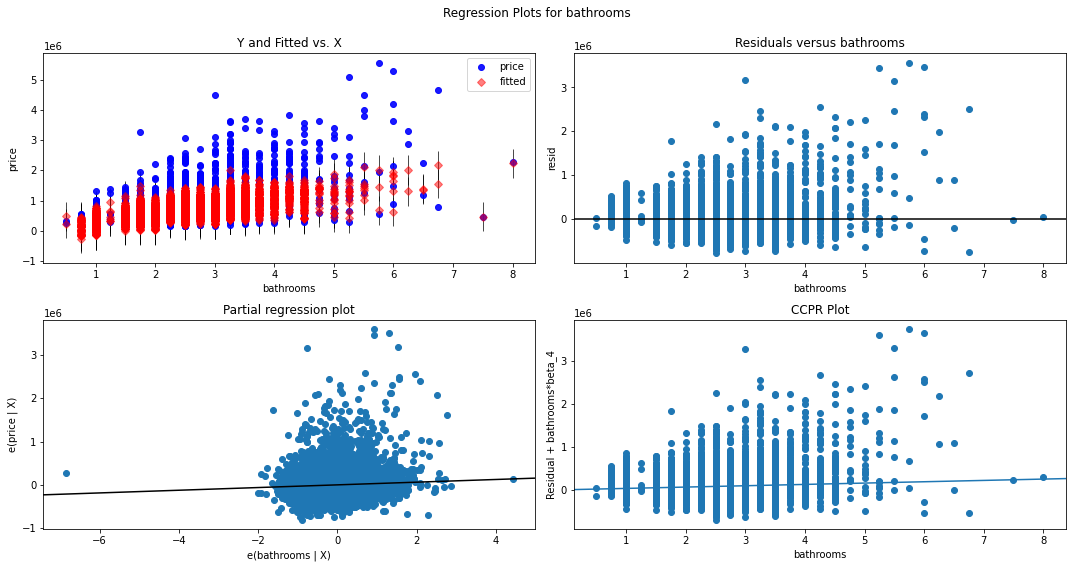

In [159]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_with_linear_variables, "bathrooms", fig=fig)
plt.show()

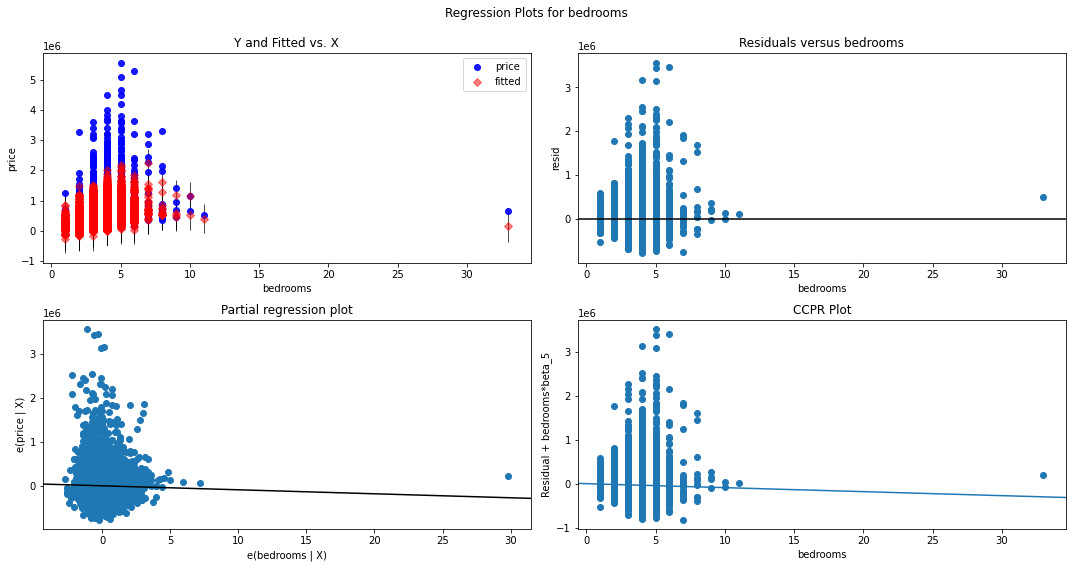

In [160]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_with_linear_variables, "bedrooms", fig=fig)
plt.show()

From these graphs it looks like the only variable that doesn't have a pattern in the errors is bedrooms. All the others have some heteroscedasticity, or linearity.
We alse see that the Jarque-Bera test shows they are very abnormaly distributed.
The first thing we wanna do is normalize our target variable to see if that helps at all.

(array([1.1842e+04, 3.5560e+03, 5.5600e+02, 1.3800e+02, 6.0000e+01,
        2.5000e+01, 1.2000e+01, 2.0000e+00, 3.0000e+00, 3.0000e+00]),
 array([  78000.,  627200., 1176400., 1725600., 2274800., 2824000.,
        3373200., 3922400., 4471600., 5020800., 5570000.]),
 <BarContainer object of 10 artists>)

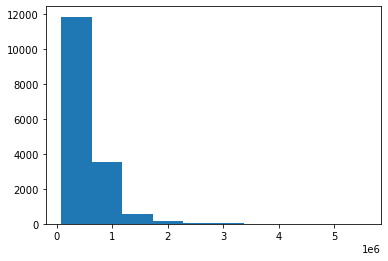

In [163]:
plt.hist(lin_y_train)

In [164]:
# outcome = np.log(lin_y_train)
# predictors = lin_X_train
# pred_sum = '+'.join(predictors.columns)
# formula = outcome + '~' + pred_sum
# model_with_linear_variables = ols(formula=formula, data=non_colinear_df).fit()
# model_with_linear_variables.summary()

In [94]:
lr = LinearRegression()
lr.fit(lin_X_train, lin_y_train)
print('The training set score is :', lr.score(lin_X_train, lin_y_train))
print('The test set score is :', lr.score(lin_X_test, lin_y_test))

The training set score is : 0.5224767203163343
The test set score is : 0.48078713243434734


In [95]:
y_pred = model.predict(lin_X_test)

actual = lin_y_test
predicted = y_pred

mse = metrics.mean_squared_error(actual, predicted)

rmse = np.sqrt(mse)

print(rmse)

281266.4407116422


After narrowing our independent variables down to 5 variables, our model has a decent R-squared and a very bad RMSE. Even worse then our model that included everything.

Before we give up on these variables, lets see if we can improve them with some feature enginerring.